# Albumentations library for data augmentation

[Original video](https://youtu.be/rAdLwKJBvPM)

[Albumentations examples](https://albumentations.ai/docs/examples/)

## Get GitHub with images

In [ ]:
# Get Aladdin Persson GitHub repository
!git clone https://github.com/aladdinpersson/Machine-Learning-Collection.git

Cloning into 'Machine-Learning-Collection'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 508 (delta 52), reused 137 (delta 20), pack-reused 261
Receiving objects: 100% (508/508), 19.44 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (103/103), done.


## Import libraries and visualization

In [ ]:
# Google CoLab has old version of albumentations library. Update it.
# Maybe after update restart the runtime.
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-twa7_vvn
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-twa7_vvn
     |████████████████████████████████| 952kB 13.2MB/s 
  Created wheel for albumentations: filename=albumentations-0.5.2-cp37-none-any.whl size=86173 sha256=dd4a852ff011d67a6f10f1e7e89a891f30485d4dfec3ef8b3a05b6fc2f944187
  Stored in directory: /tmp/pip-ephem-wheel-cache-4946faqb/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import os
import cv2
import torch
import numpy as np
import torch.nn as nn
import albumentations as A
import matplotlib.pyplot as plt

from PIL import Image
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader, Dataset

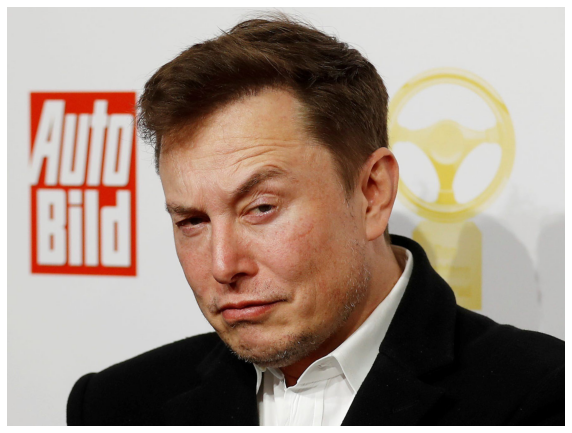

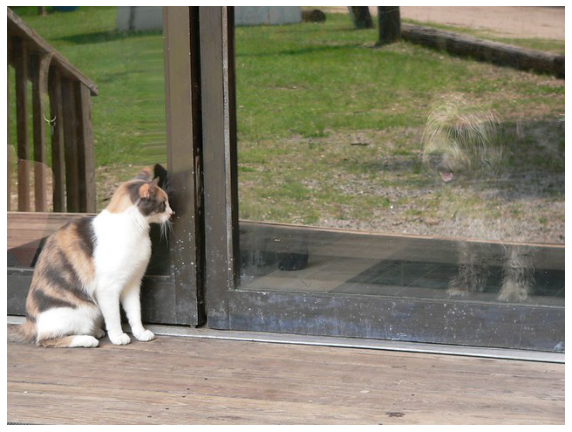

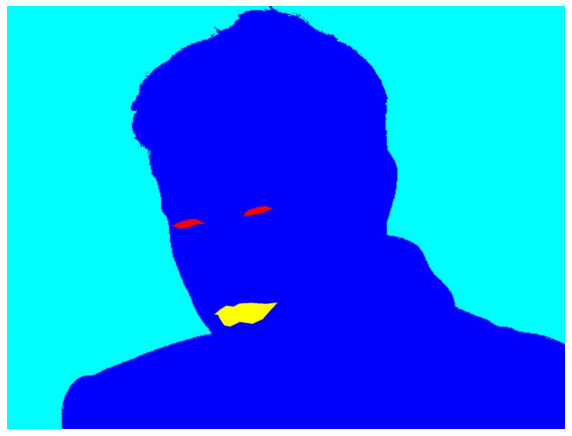

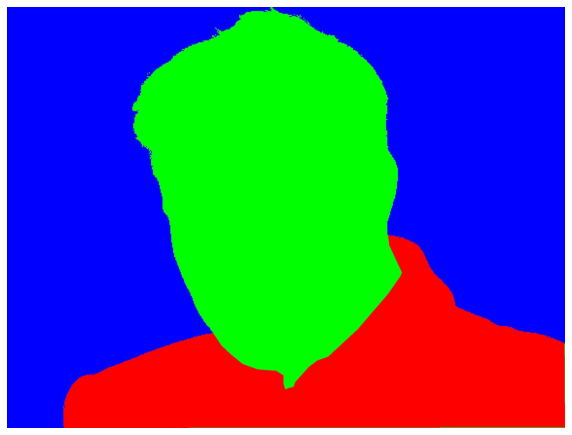

In [ ]:
images_dir = 'Machine-Learning-Collection/ML/Pytorch/Basics/albumentations_tutorial/images'

def visualize(img_list):
    if type(img_list) is str:
        img_list = [img_list]  # convert to list for single image
    for l in img_list:
        img = Image.open(os.path.join(images_dir, l))
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()


def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(min(rows*columns, len(images))):
        if bboxes is not None:
            img = visualize_bbox(images[i], bboxes[i], class_name="Elon")
        else:
            img = images[i]
        fig.add_subplot(rows, columns, i+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


# From https://albumentations.ai/docs/examples/example_bboxes/
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    """ Visualizes a single bounding box on the image """
    if bbox is None:
        return img
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img


visualize(os.listdir(images_dir))

## Classification

In [ ]:
image = Image.open(os.path.join(images_dir, 'elon.jpeg'))

transforms_list = [
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=30, border_mode=cv2.BORDER_CONSTANT, p=0.9),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.1),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.8),
    A.OneOf([  # choose one of several different augmentations
        A.Blur(blur_limit=3, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25),
        A.HueSaturationValue(),
    ], p=1.0),
]

my_transforms = A.Compose(transforms=transforms_list)

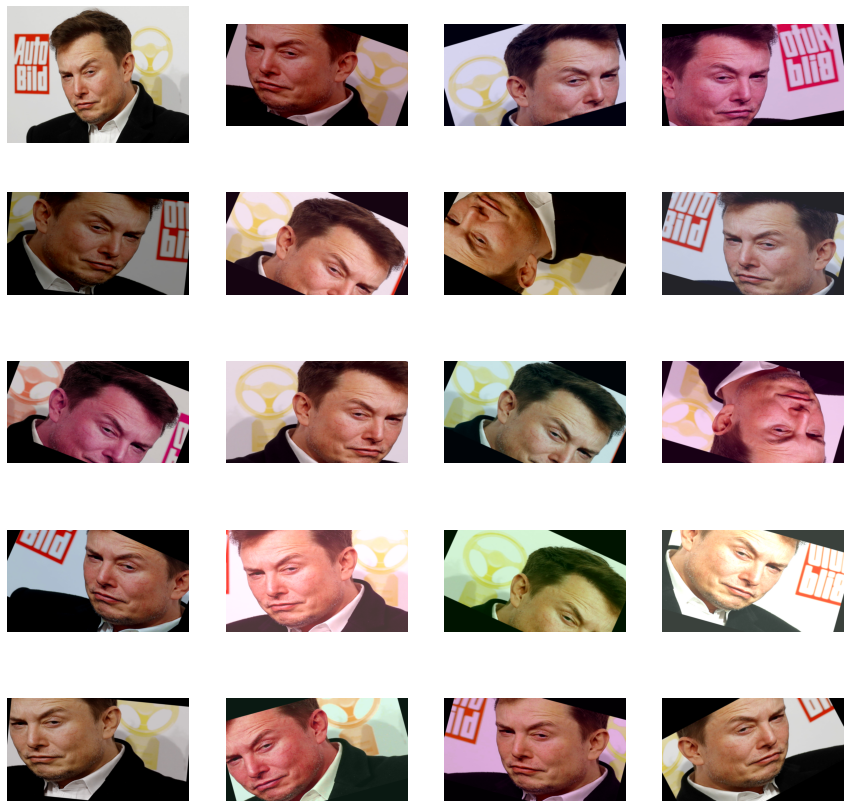

In [ ]:
images_list = [image]
image = np.array(image)  # convert image to NumPy array

for i in range(19):
    augmentations = my_transforms(image=image)
    augmented_img = augmentations['image']
    images_list.append(augmented_img)

plot_examples(images_list)

## Segmentation

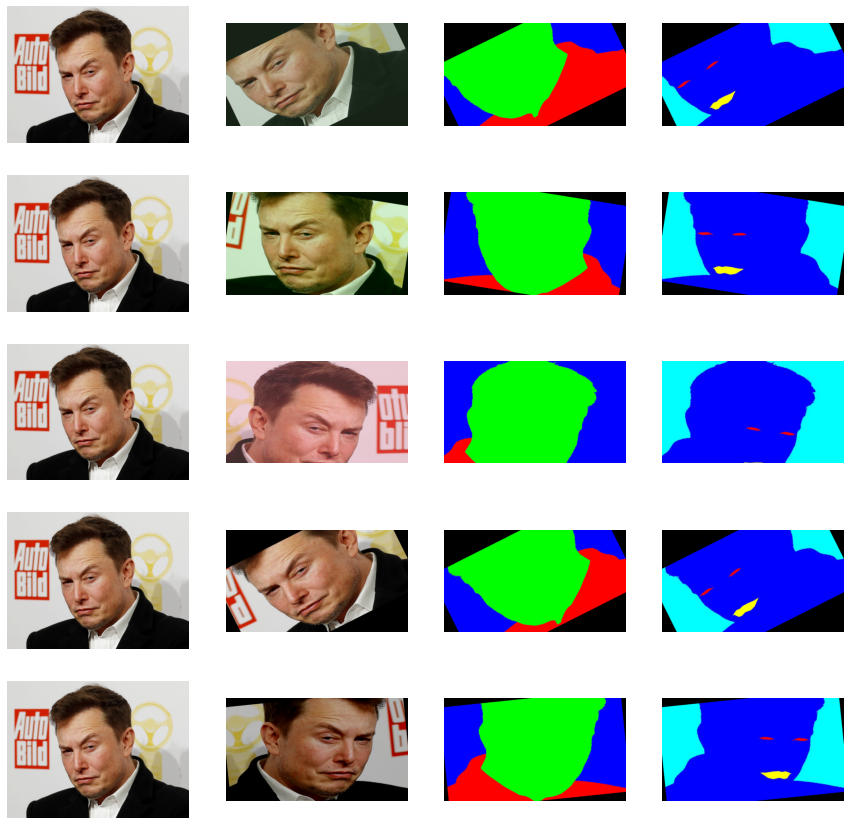

In [ ]:
images_list = []
mask = Image.open(os.path.join(images_dir, 'mask.jpeg'))
mask2 = Image.open(os.path.join(images_dir, 'second_mask.jpeg'))
mask = np.array(mask)
mask2 = np.array(mask2)

for i in range(5):
    augmentations = my_transforms(image=image, masks=[mask, mask2])
    augmented_img = augmentations['image']
    augmented_masks = augmentations['masks']
    images_list.append(image)
    images_list.append(augmented_img)
    images_list.append(augmented_masks[0])
    images_list.append(augmented_masks[1])

plot_examples(images_list)

## Detection

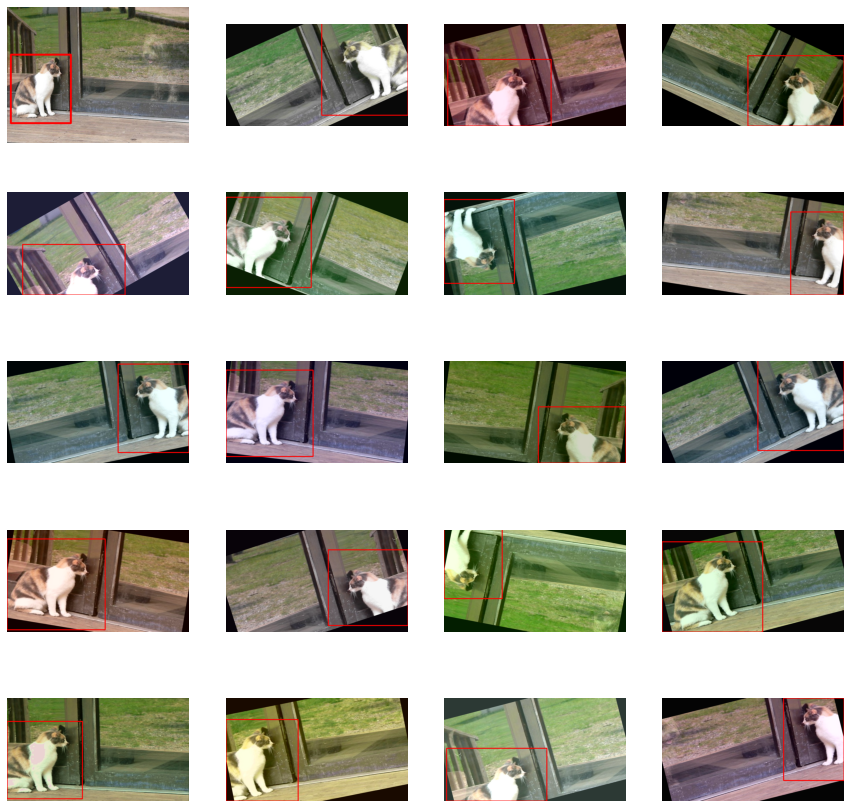

In [ ]:
# Like in Pascal_VOC: [x_min, y_min, x_max, y_max]
bboxes = [[13, 170, 224, 410],]  # list of bounding boxes

my_transforms2 = A.Compose(
    transforms=transforms_list,
    # Supports 4 formats: pascal_voc, albumentations, coco, and yolo .
    bbox_params=A.BboxParams(
        format='pascal_voc',
        min_visibility=0.5,
        label_fields=[],)
)

# Open image with OpenCV. Doesn't have to convert OpenCV to NumPy array.
image = cv2.imread(os.path.join(images_dir, 'cat.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

images_list = [image]
saved_bboxes = [bboxes[0]]

for i in range(50):
    augmentations = my_transforms2(image=image, bboxes=bboxes)
    if len(augmentations['bboxes']) == 0:
        continue
    augmented_img = augmentations['image']
    augmented_bbox = augmentations['bboxes'][0]
    images_list.append(augmented_img)
    saved_bboxes.append(augmented_bbox)

plot_examples(images_list, saved_bboxes)

## PyTorch example

In [ ]:
cats_dogs_dir = 'Machine-Learning-Collection/ML/Pytorch/Basics/albumentations_tutorial/cat_dogs'

class ImageFolder(Dataset):
    def __init__(self, root_dir, transform=None):
        super(ImageFolder, self).__init__()
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names = os.listdir(self.root_dir)

        for index, name in enumerate(self.class_names):
            files = os.listdir(os.path.join(self.root_dir, name))
            self.data += list(zip(files, [index]*len(files)))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_file, label = self.data[index]
        file_path = os.path.join(self.root_dir, self.class_names[label], img_file)
        image = np.array(Image.open(file_path))

        if self.transform is not None:
            augmentations = self.transform(image=image)
            image = augmentations['image']

        return image, label

transforms_list3 = [
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=30, border_mode=cv2.BORDER_CONSTANT, p=0.9),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.1),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.8),
    A.OneOf([  # choose one of several different augmentations
        A.Blur(blur_limit=3, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25),
        A.HueSaturationValue(),
    ], p=1.0),
    A.Normalize(mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255),
    ToTensorV2(),  # do not divide on 255 for albumentations
]

my_transforms3 = A.Compose(transforms=transforms_list3)

In [ ]:
dataset = ImageFolder(root_dir=cats_dogs_dir, transform=my_transforms3)

for x, y in dataset:
    print(x.shape)

torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
torch.Size([3, 720, 1280])
